# IMPORT GLOBALES

In [29]:
import pandas as pd
import numpy as np
import  requests
import io
from matplotlib import pyplot as plt
import seaborn as sns

# VARIABLES GLOBALES

In [30]:
API_KEY="jsgiGncqwUmnjjJ7OYQSJh9vl9OpfDXWkEu0gBI8"
DATASET_ACCESOS_HOGARES="PENET-DE-INTER-FIJO-57760"
URL_ACCESOS_HOGARES = "https://datosabiertos.enacom.gob.ar/rest/datastreams/291794/data.csv"
URL_ACCESOS_PERSONAS_HOGARES = "https://datosabiertos.enacom.gob.ar/rest/datastreams/291793/data.csv"

#LECTURA DE ARCHIVOS

In [31]:
def get_df_from_url(url):
  return pd.read_csv(url, encoding="utf-8")

def get_api_df(dataset):
  url = f"https://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{dataset}/data.csv/?auth_key={API_KEY}"

  return get_df_from_url(url)

def get_csv_df(path: str):
  return pd.read_csv(path, encoding="utf-8")

In [32]:
df_accesos_hogares = get_df_from_url(URL_ACCESOS_HOGARES)
df_accesos_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [33]:
df_accesos_hogares = df_accesos_hogares.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)
df_accesos_hogares.rename(columns = {'Accesos por cada 100 hogares':'accesos_100_hogares'}, inplace = True)
df_accesos_hogares

,Año,Trimestre,Provincia,accesos_100_hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


In [34]:
df_accesos_personas = get_df_from_url(URL_ACCESOS_PERSONAS_HOGARES)
df_accesos_personas.head(10)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021
5,2021,3,"70,58","21,98",Jul-Sept 2021
6,2021,2,"69,24","21,55",Abr-Jun 2021
7,2021,1,"67,95","21,13",Ene-Mar 2021
8,2020,4,"67,62","21,01",Oct-Dic 2020
9,2020,3,"66,31","20,59",Jul-Sept 2020


In [35]:
df_accesos_personas = df_accesos_personas.drop(['Periodo'], axis=1)
df_accesos_personas.rename(columns = {'Accesos por cada 100 hogares':'accesos_100_hogares_nac','Accesos por cada 100 hab':'accesos_100_hab_nac'}, inplace = True)
df_accesos_personas.head(10)

,Año,Trimestre,accesos_100_hogares_nac,accesos_100_hab_nac
0,2022,4,"77,21","24,15"
1,2022,3,"76,64","23,95"
2,2022,2,"75,97","23,72"
3,2022,1,"73,88","23,05"
4,2021,4,"73,18","22,81"
5,2021,3,"70,58","21,98"
6,2021,2,"69,24","21,55"
7,2021,1,"67,95","21,13"
8,2020,4,"67,62","21,01"
9,2020,3,"66,31","20,59"


In [36]:
df_accesos_personas = pd.merge(df_accesos_personas, df_accesos_hogares[["Año","Trimestre","Provincia","accesos_100_hogares"]], on=["Año","Trimestre"], how="left")
df_accesos_personas.head(10)

,Año,Trimestre,accesos_100_hogares_nac,accesos_100_hab_nac,Provincia,accesos_100_hogares
0,2022,4,"77,21","24,15",Buenos Aires,"78,94"
1,2022,4,"77,21","24,15",Capital Federal,"122,73"
2,2022,4,"77,21","24,15",Catamarca,"65,77"
3,2022,4,"77,21","24,15",Chaco,"43,62"
4,2022,4,"77,21","24,15",Chubut,"85,57"
5,2022,4,"77,21","24,15",Córdoba,"89,03"
6,2022,4,"77,21","24,15",Corrientes,"51,64"
7,2022,4,"77,21","24,15",Entre Ríos,"64,01"
8,2022,4,"77,21","24,15",Formosa,"39,41"
9,2022,4,"77,21","24,15",Jujuy,"58,46"


In [37]:
df_accesos_personas = df_accesos_personas.drop("accesos_100_hab_nac", axis=1)

# ANALISIS

## ANALISIS GENERAL

In [38]:
df_accesos_personas.columns

Index(['Año', 'Trimestre', 'accesos_100_hogares_nac', 'Provincia',
       'accesos_100_hogares'],
      dtype='object')

In [39]:
df_accesos_personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      864 non-null    int64 
 1   Trimestre                864 non-null    int64 
 2   accesos_100_hogares_nac  864 non-null    object
 3   Provincia                864 non-null    object
 4   accesos_100_hogares      864 non-null    object
dtypes: int64(2), object(3)
memory usage: 40.5+ KB


In [40]:
df_accesos_personas.describe()

,Año,Trimestre
count,864.000000,864.000000
mean,2018.000000,2.500000
std,2.583484,1.118682
min,2014.000000,1.000000
25%,2016.000000,1.750000
50%,2018.000000,2.500000
75%,2020.000000,3.250000
max,2022.000000,4.000000


## TRATAMIENTO DE DATOS NULOS

In [41]:
df_accesos_personas.isnull().sum()

Año                        0
Trimestre                  0
accesos_100_hogares_nac    0
Provincia                  0
accesos_100_hogares        0
dtype: int64

In [42]:
df_accesos_personas["Año"].unique().tolist()

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]

## FORMATEO DE DATOS

In [43]:
df_accesos_personas['accesos_100_hogares'] = df_accesos_personas['accesos_100_hogares'].str.replace(',', '.')
df_accesos_personas['accesos_100_hogares'] = df_accesos_personas['accesos_100_hogares'].astype(float)


In [44]:
df_accesos_personas['accesos_100_hogares_nac'] = df_accesos_personas['accesos_100_hogares_nac'].str.replace(',', '.')
df_accesos_personas['accesos_100_hogares_nac'] = df_accesos_personas['accesos_100_hogares_nac'].astype(float)

In [45]:
df_accesos_personas

,Año,Trimestre,accesos_100_hogares_nac,Provincia,accesos_100_hogares
0,2022,4,77.21,Buenos Aires,78.94
1,2022,4,77.21,Capital Federal,122.73
2,2022,4,77.21,Catamarca,65.77
3,2022,4,77.21,Chaco,43.62
4,2022,4,77.21,Chubut,85.57
...,...,...,...,...,...
859,2014,1,49.55,Santa Cruz,28.94
860,2014,1,49.55,Santa Fe,47.85
861,2014,1,49.55,Santiago Del Estero,16.31
862,2014,1,49.55,Tierra Del Fuego,63.97


In [46]:
df_accesos_personas=df_accesos_personas.rename(columns={"accesos_100_hogares_nac":"accesos_%home_pais","accesos_100_hogares":"accesos_%home_prov"})

## GRAFICOS

In [47]:
df_grafico_personas=df_accesos_personas.copy()

In [48]:
df_grafico_personas.describe()

,Año,Trimestre,accesos_%home_pais,accesos_%home_prov
count,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,60.745833,49.620301
std,2.583484,1.118682,8.398931,23.319150
min,2014.000000,1.000000,49.550000,9.350000
25%,2016.000000,1.750000,53.162500,32.220000
50%,2018.000000,2.500000,59.925000,46.390000
75%,2020.000000,3.250000,66.637500,62.442500
max,2022.000000,4.000000,77.210000,124.060000


<ipython-input-49-88ca6b9e9cde>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = selected_columns.groupby(["Año"]).sum()


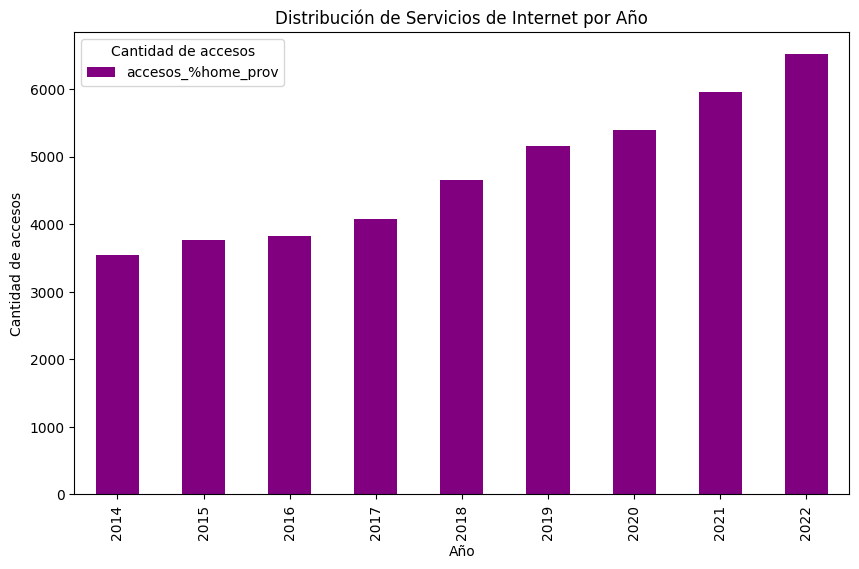

In [49]:
selected_columns = df_grafico_personas[['Año','accesos_%home_prov','Provincia',]]
grouped = selected_columns.groupby(["Año"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["purple","red","black","lightblue"])
plt.title('Distribución de Servicios de Internet por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Cantidad de accesos')
plt.show()

<ipython-input-50-9df109477d36>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = selected_columns.groupby(["Año"]).sum()


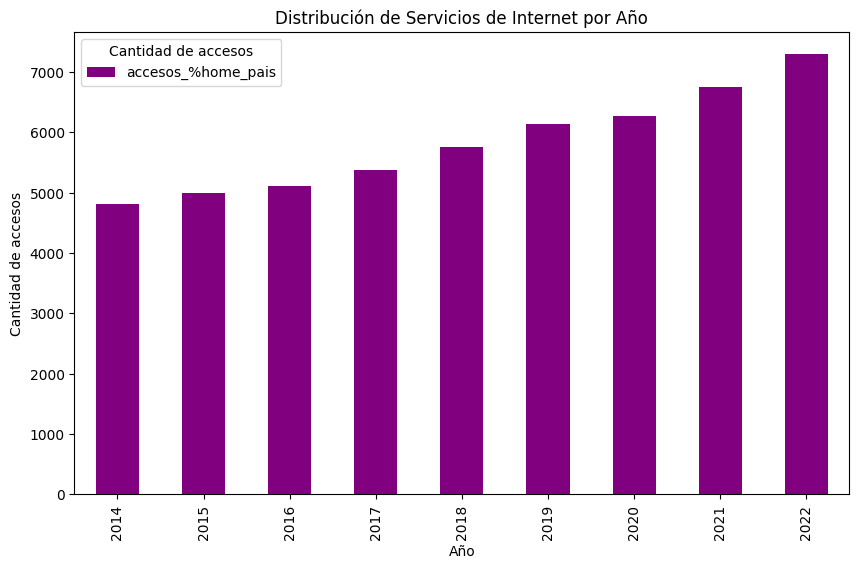

In [50]:
selected_columns = df_grafico_personas[['Año','accesos_%home_pais','Provincia',]]
grouped = selected_columns.groupby(["Año"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["purple","red","black","lightblue"])
plt.title('Distribución de Servicios de Internet por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Cantidad de accesos')
plt.show()

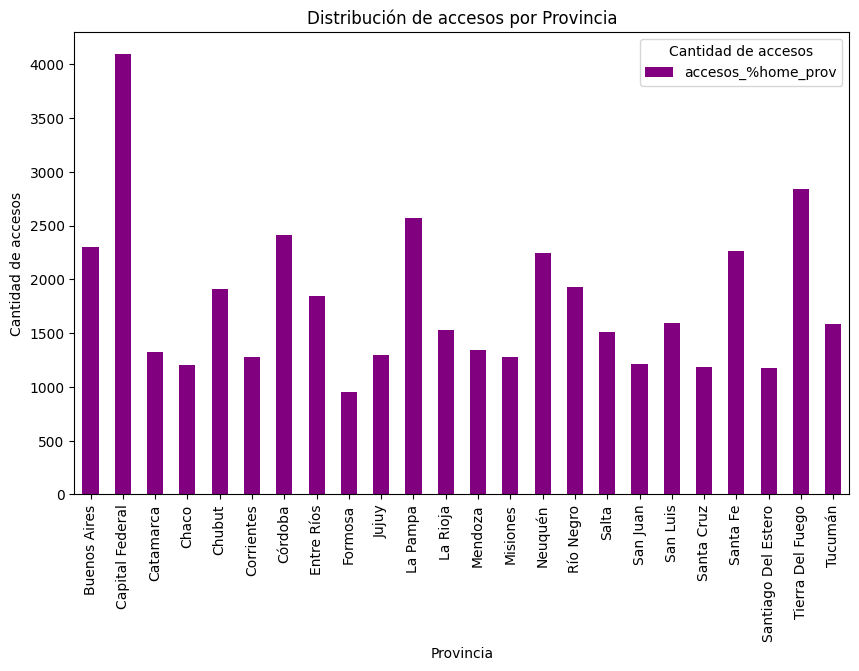

In [51]:
selected_columns = df_grafico_personas[['accesos_%home_prov','Provincia',]]
grouped = selected_columns.groupby(["Provincia"]).sum()

# Gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=["purple","red","black","lightblue"])
plt.title('Distribución de accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Cantidad de accesos')
plt.show()

# EXTRACION DE DATOS POR PROVINCIAS

In [52]:
df_provincial = df_grafico_personas.copy()

In [53]:
df_provincial

,Año,Trimestre,accesos_%home_pais,Provincia,accesos_%home_prov
0,2022,4,77.21,Buenos Aires,78.94
1,2022,4,77.21,Capital Federal,122.73
2,2022,4,77.21,Catamarca,65.77
3,2022,4,77.21,Chaco,43.62
4,2022,4,77.21,Chubut,85.57
...,...,...,...,...,...
859,2014,1,49.55,Santa Cruz,28.94
860,2014,1,49.55,Santa Fe,47.85
861,2014,1,49.55,Santiago Del Estero,16.31
862,2014,1,49.55,Tierra Del Fuego,63.97


In [54]:
df_provincial=df_provincial.drop("accesos_%home_pais", axis=1)

In [55]:
df_provincial

,Año,Trimestre,Provincia,accesos_%home_prov
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


# EXPORTAR DATOS

In [57]:
df_provincial.to_csv("data/porcentaje_provincias.csv", index=False)